# Jaklyn Soler

# Module 4 Project

# Strategic Summary

### Objective

It is April 2018 and I have been tasked with recommending 5 top zip codes to a real estate investment company. My responsibilities include analyzing risk, profit, and exploring other concepts independently. 

### Strategic Data Selection

In order to select the area, I defined the best strategy as long term property rentals. I defined the best area as the northeast due to the low rental vacancy rate. One common strategy real estate investors employ is seeking out probate properties and due to the high amount of baby boomers in New York, it is likely that there will be a high number of properties in the probate system over the next 20 years. Therefore, New York was selected as the best state for investments. An assumption that the real estate investment company has a large amount of capital was assumed in order to select the parameters of price for the properties. Properties between 500000 dollars and 700000 dollars were selected as they will have a high amount of value which means high rental prices and simletaneously allow the investor to have multiple properties so that having a problem with one tenant wont put a halt on cash flow. 

### Return on Investment 

After these decisions were made, I analysed percentage of roi on value of the home. Average monthly rental amount falls between .8% and 1.1% of the property value. By having a more competitive rental price, property owners can be more selective in their tenant evaluation since it will attract more interested renters. In light of this strategy, I selected the monthly rental amount of .9% meaning that in a 12 month period, the tenant would pay 10.8% of the property value. Not accounting for property maintenance and vacancy, every property would pay for its initial amount in 9 years and four months.

### Layout
 - PART ONE: Introduction & Zipcode Analysis
 - PART TWO: Zipcode Analysis
 - PART THREE: Zipcode Analysis
 - PART FOUR: Final Analysis & Conclusion

### Objective

It is April 2018 and I have been tasked with recommending 5 top zip codes to a real estate investment company. My responsibilities include analyzing risk, profit, and exploring other concepts independently. 

### Strategic Data Selection

In order to select the area, I defined the best strategy as long term property rentals. I defined the best area as the northeast due to the low rental vacancy rate. One common strategy real estate investors employ is seeking out probate properties and due to the high amount of baby boomers in New York, it is likely that there will be a high number of properties in the probate system over the next 20 years. Therefore, New York was selected as the best state for investments. An assumption that the real estate investment company has a large amount of capital was assumed in order to select the parameters of price for the properties. Properties between 500000 dollars and 700000 dollars were selected as they will have a high amount of value which means high rental prices and simletaneously allow the investor to have multiple properties so that having a problem with one tenant wont put a halt on cash flow. 

### Return on Investment 

After these decisions were made, I analysed percentage of roi on value of the home. Average monthly rental amount falls between .8% and 1.1% of the property value. By having a more competitive rental price, property owners can be more selective in their tenant evaluation since it will attract more interested renters. In light of this strategy, I selected the monthly rental amount of .9% meaning that in a 12 month period, the tenant would pay 10.8% of the property value. Not accounting for property maintenance and vacancy, every property would pay for its initial amount in 9 years and four months.

### Layout
 - PART ONE: Introduction & Zipcode Analysis
 - PART TWO: Zipcode Analysis
 - PART THREE: Zipcode Analysis
 - PART FOUR: Final Analysis & Conclusion

# Loading Zillow Data

### Relevant packages can be imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import xlrd
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from sklearn.metrics import r2_score
from pmdarima.arima import ndiffs
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.tsa.stattools import adfuller

### ACF & PACF Function

In [2]:
def plot_acf_pacf(ts, figsize=(10,8), lags = 24, zipcode = 'add'):
    
    fig,ax = plt.subplots(nrows=3,
                         figsize = figsize)
    
    #plot time series
    ts.plot(ax=ax[0])
    
    #plot acf, pacf
    plot_acf(ts,ax=ax[1], lags=lags)
    plot_pacf(ts, ax=ax[2], lags=lags)
    fig.tight_layout()
    
    fig.suptitle(f'Zipcode: {zipcode}',y=1.1, fontsize=20)
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(min_n_ticks=lags, integer = True))
        a.xaxis.grid()
    return fig,ax


### Truncating can be removed for better analysis. 

In [3]:
pd.set_option('display.max_columns', None) #prevents trailing elipses
pd.set_option('display.max_rows', None)

# Unpickling queens_grouped & results Dataframes

In [4]:
queens_grouped = pd.read_pickle("./queens_grouped.pkl")

In [5]:
results = pd.read_pickle("./newest_results.pkl")

# 11416

In [6]:
four_one_six = queens_grouped.loc[11416]

In [7]:
four_one_six.tail()

,value
time,
2017-12-31,498900.0
2018-01-31,504900.0
2018-02-28,509800.0
2018-03-31,514000.0
2018-04-30,517300.0


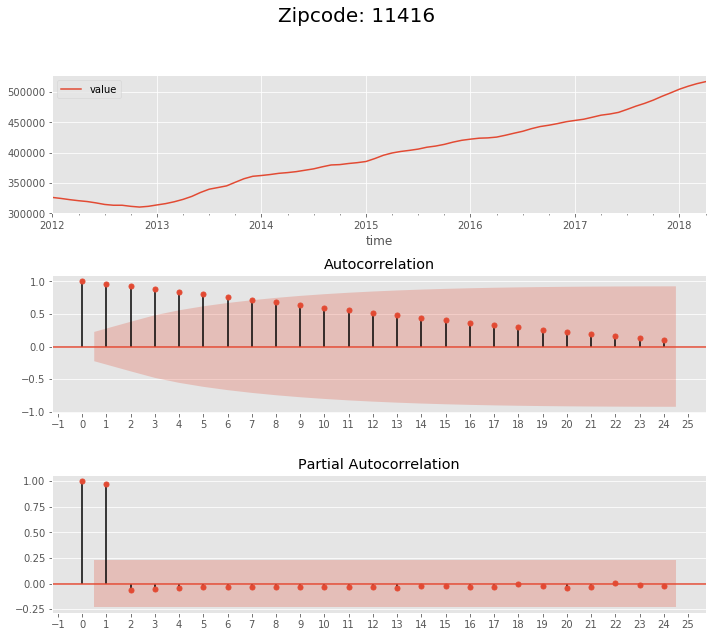

In [8]:
plot_acf_pacf(four_one_six, zipcode = '11416')
plt.show()

### Decompose Time Series

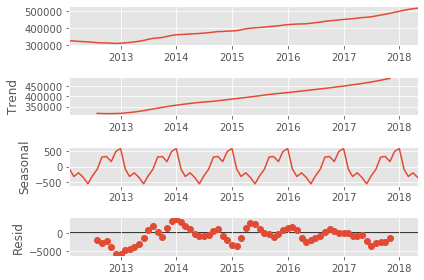

In [9]:
decompose_result = seasonal_decompose(four_one_six, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function

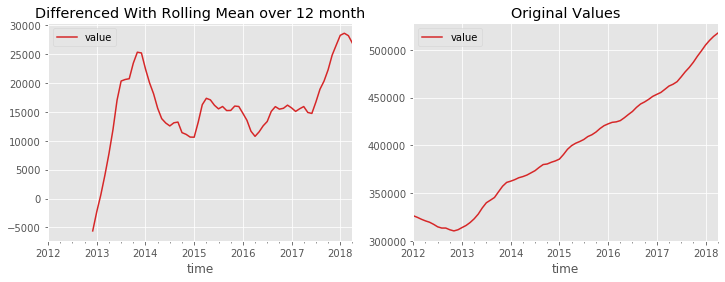

In [10]:
rolling_mean = four_one_six.rolling(window = 12).mean()
four_one_six_rolled_detrended = four_one_six - rolling_mean

ax1 = plt.subplot(121)
four_one_six_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
four_one_six.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

In [11]:
dftest = adfuller(four_one_six_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.5313668298170304
2. P-Value :  0.007217136361593485
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 61
5. Critical Values :
	 1% :  -3.542412746661615
	 5% :  -2.910236235808284
	 10% :  -2.5927445767266866


In [12]:
four_one_six = four_one_six_rolled_detrended

### SARIMAX Modeling: Parameter Selection

In [13]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [14]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(four_one_six,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

### Fitting the Time Series Model - SARIMAX

In [15]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

In [16]:
best_params = dict(ans_df.loc[ans_df['aic'].idxmin()])
best_params

{'pdq': (0, 2, 2), 'pdqs': (0, 2, 2, 12), 'aic': 395.59225708255303}

In [17]:
best_params['pdq']

(0, 2, 2)

In [18]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(four_one_six, 
                                        order= best_params['pdq'], 
                                        seasonal_order=best_params['pdqs'], 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   76
Model:             SARIMAX(0, 2, 2)x(0, 2, 2, 12)   Log Likelihood                -192.796
Date:                            Mon, 21 Dec 2020   AIC                            395.592
Time:                                    22:21:50   BIC                            401.270
Sample:                                01-31-2012   HQIC                           397.020
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5939      0.489      1.216      0.224      -0.364       1.551
ma.L2         -0.9497      0.415     -2.288      0.022      -1.763      -0.136
ma.S.L12      -2.4641      1.531     -1.609      0.108      -5.465       0.537
ma.S.L24       1.9019      1.354      1.405      0.160      -0.752       4.556
sigma2      1.789e+05    2.6e+05      0.689      0.491    -3.3e+05    6.88e+05
===================================================================================
Ljung-Box (Q):                       26.33   Jarque-Bera (JB):                 1.41
Prob(Q):                              0.24   Prob(JB):                         0.49
Heteroskedasticity (H):               2.10   Skew:                            -0.38
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Plot Diagnostics

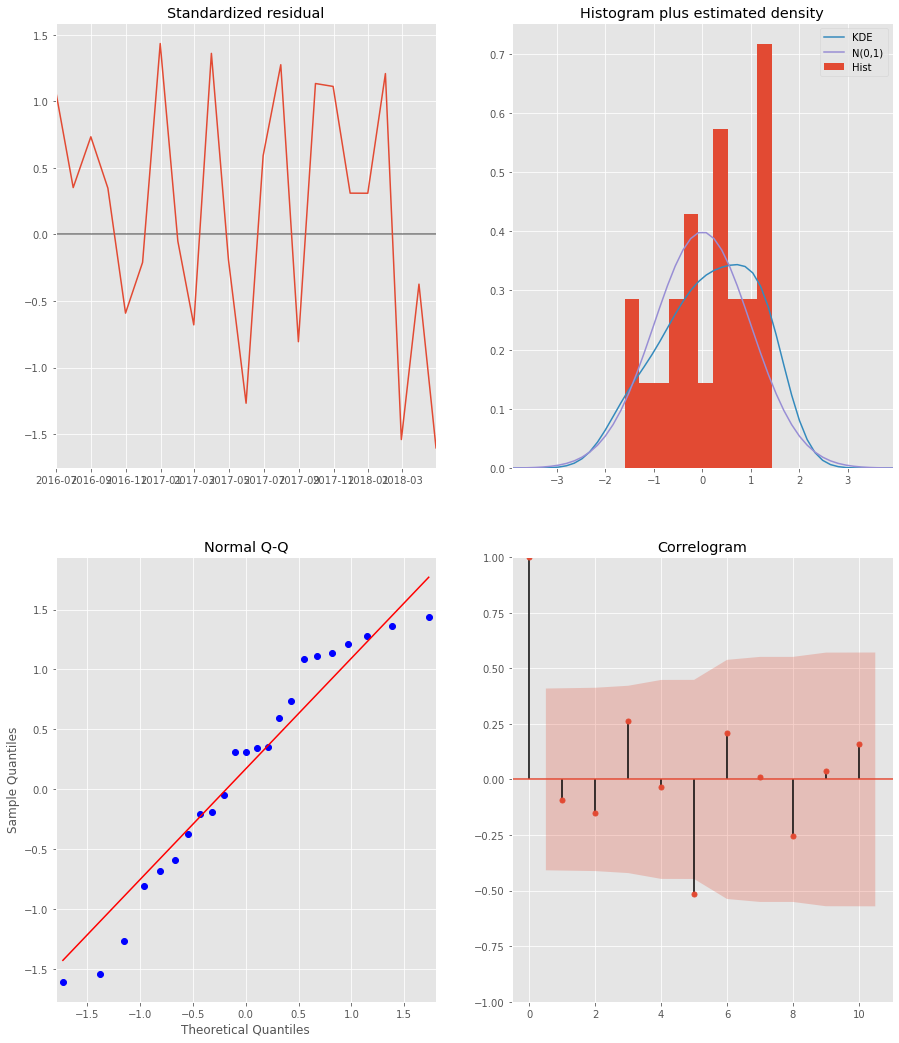

In [19]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [20]:
four_one_six[60:]

,value
time,
2017-01-31,15666.666667
2017-02-28,15058.333333
2017-03-31,15516.666667
2017-04-30,15900.000000
2017-05-31,14875.000000
2017-06-30,14708.333333
2017-07-31,16691.666667
2017-08-31,18891.666667
2017-09-30,20300.000000


In [21]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

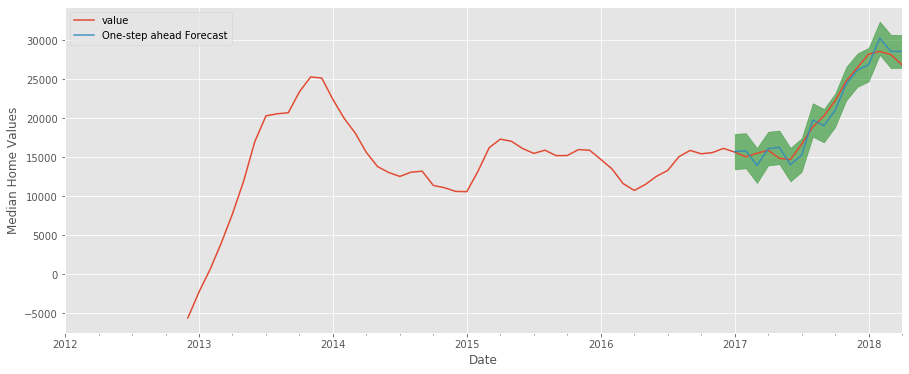

In [22]:

rcParams['figure.figsize'] = 15, 6

ax = four_one_six['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [23]:
val_forecasted = pred.predicted_mean
val_truth = four_one_six.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1208107.55


### Model Validation - Dynamic Forecasting

In [24]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()


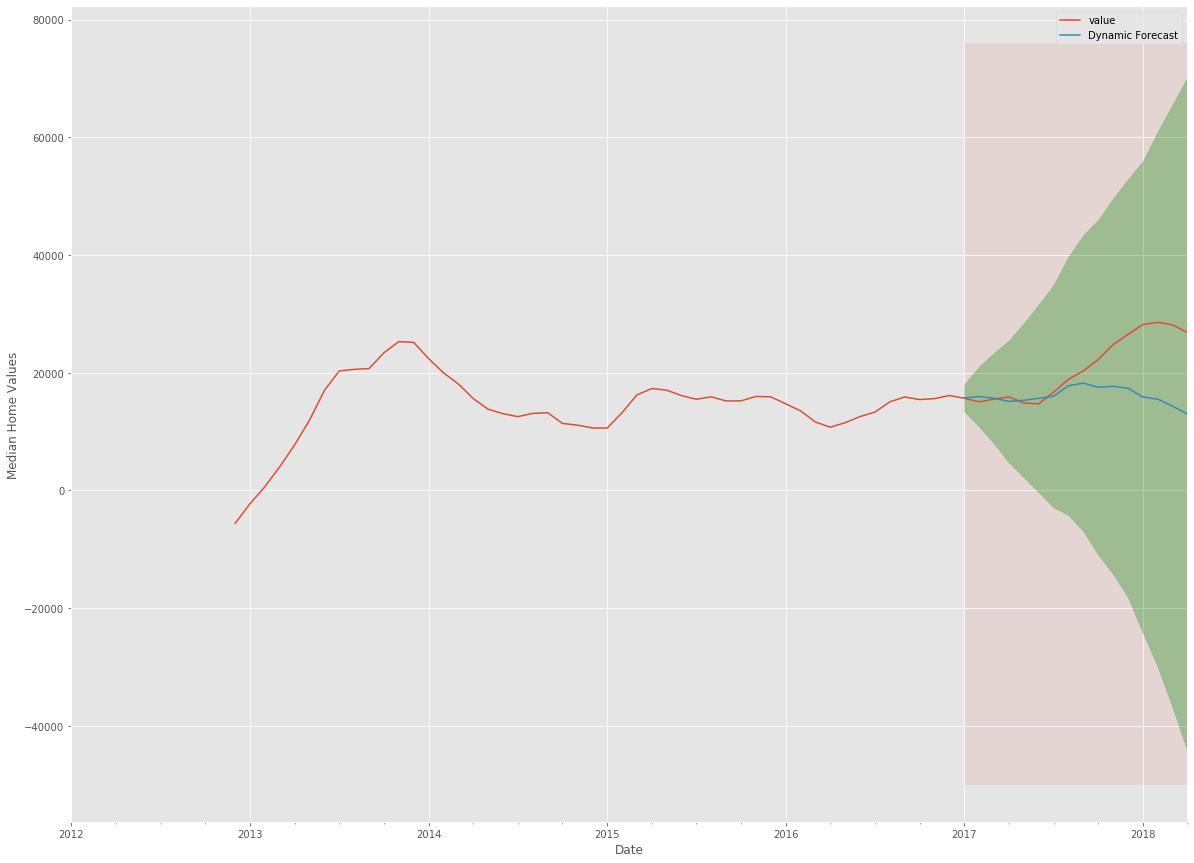

In [25]:
ax = four_one_six['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [26]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = four_one_six.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 54329577.7


### Visualizing Confidence Interval

In [27]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

pred_conf['mean'] = prediction.predicted_mean

pred_conf.head()

,lower value,upper value,mean
2018-05-31,23005.979221,27227.761201,25116.870211
2018-06-30,20086.104132,29645.105400,24865.604766
2018-07-31,19150.704076,33484.477925,26317.591000
2018-08-31,19239.942735,38446.127278,28843.035006
2018-09-30,18068.498022,42348.973899,30208.735960


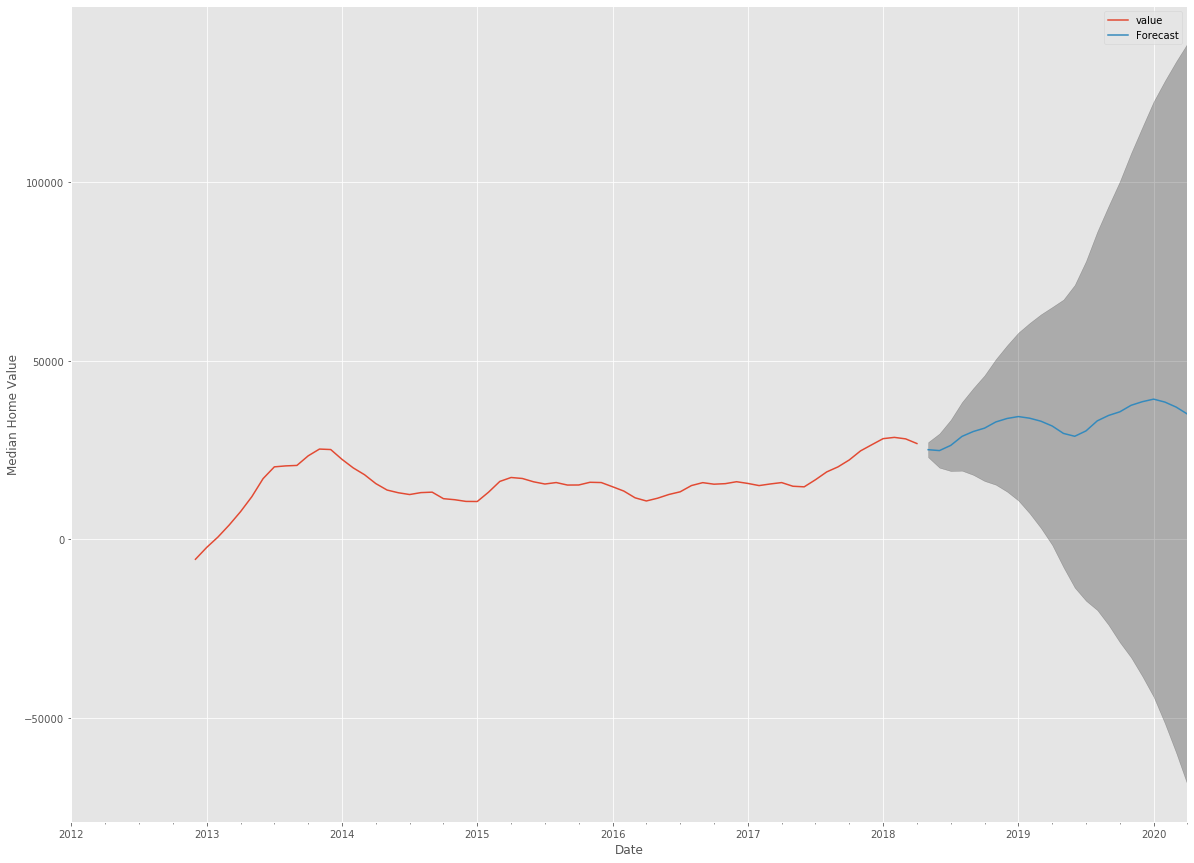

In [28]:
ax = four_one_six.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

# Average Return on Investment (ROI) Percentage

The earliest predicted mean represents the value or possible cost of the property at the beginning of the real estate investing initiative. We calculate the percentage of return by subtracting cost from the average predicted values and dividing by the cost. Holding on to a percentage allows for comparison between other zipcodes.

In [29]:
cost = pred_conf.iloc[0]['mean']
roi = (pred_conf - cost)/ cost * 100

roi


,lower value,upper value,mean
2018-05-31,-8.404276,8.404276,0.000000
2018-06-30,-20.029431,18.028660,-1.000385
2018-07-31,-23.753621,33.314691,4.780535
2018-08-31,-23.398327,53.068941,14.835307
2018-09-30,-28.062303,68.607687,20.272692
2018-10-31,-34.864550,82.957033,24.046242
2018-11-30,-39.056308,100.960708,30.952200
2018-12-31,-46.774966,116.425967,34.825501
2019-01-31,-56.680798,130.584205,36.951703
2019-02-28,-71.000422,141.282829,35.141204


# Results Dataframe

In [35]:
results.AIC[12] = 395.59
results.Investment_Required[12] = 517300
results.ROI_Percentage[12] = 39.706
results

,Zipcode,AIC,Investment_Required,ROI_Percentage
0,11385,419,657500,211
1,11414,431,669800,24
2,11378,415,696100,-25
3,11421,431,547100,24
4,11418,425,611500,481
5,11423,400,533400,107
6,11369,425,675700,481
7,11417,406,510000,-82
8,11427,420,587700,1438
9,11426,418,604400,-333


### Narrowing Down Zipcodes

Zipcodes with less than a 30% ROI can be removed.

In [38]:
results = results[results['ROI_Percentage'] > 30]

In [39]:
results

,Zipcode,AIC,Investment_Required,ROI_Percentage
0,11385,419,657500,211
4,11418,425,611500,481
5,11423,400,533400,107
6,11369,425,675700,481
8,11427,420,587700,1438
10,11428,400,526100,370
11,11004,432,634300,186
12,11416,395,517300,39


# Conclusion

### Zipcode Recommendation in Order

The ROI percentage is representing appreciation in property value. Although the strategy recommendation is not to immediately resell the property, choosing areas where the properties are going to appreciate the most is still a strategy that maximizes profits in the long run.

1. 11427 
2. 11418
3. 11427
4. 11428
5. 11385

# Future Work

In order for this project with multiple properties to continue to be a success, the market needs to be constantly monitored so that profits can be maximized and the confidence interval can provide useful information. Additionally further work could include using a greater range than 0 to 3 on pdq parameters in SARIMAX modeling to find better models.  